# A brief consolidated multifactor analysis of the severity of accidents and casualties



---







✅ Word Count 2521 🍉 Printed pages may be missing, please visit the link below for the full version. 👇

Link to original ipynb:https://colab.research.google.com/drive/1fBLgpab46ZAH9oC8ER6Hze5JtWfxl8Ie?usp=sharing



---



# 1. Excutive summary

Several indicators were integrated, analyzed and visualized using Python's data analysis library. The relationship between multiple independent(`weather_conditions` `vehicle_type` `age_band_of_drivers` `Month`) and dependent(`accident_severity` `casualty_severity`) variables is explored, and the findings are used to make two recommendations to government departments to reduce and prevent future traffic accidents.

# 2. Dataset introduction

The data we will be working with from now on is **Road Safety Data**. It is collected by the [Department for Transport](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data). We have extracted a subset of this data for South Yorkshire using the [STATS19 R package](https://CRAN.R-project.org/package=stats19) developed by Robin Lovelace et al*.

The data comprises of three data files and 1 metadata file:

* crashes_sy_201_2020.csv
* vehicles_sy_2016_2020.csv
* casulaties_sy_2016_2020.csv
* Road-Safety-Open-Dataset-Data-Guide.xlsx (metadata)

\* Lovelace R, Morgan M, Hama L, Padgham M, Ranzolin D, Sparks A (2019). “stats 19: A package for working with open road crash data.” The Journal of Open Source Software, 4(33), 1181. doi:10.21105/joss.01181.

# 3. My research problem

In different `weather_conditions`, how do `vehicle_type` and different `age_band_of_drivers` throughout `the day` affect `accident_severity` and `casualty_severity`?


# 4. Loading the data

## 4.1 Import required libraries and data



In [ ]:
#Perparations
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#create file path variable for all needed csv files
fp_ca = '/content/drive/Shareddrives/TRP479_Spatial_Data_Science_Data/Assessment_Data/casualties_sy_2016_2020_v2.csv'
fp_cr = '/content/drive/Shareddrives/TRP479_Spatial_Data_Science_Data/Assessment_Data/crashes_sy_2016_2020_v2.csv'
fp_ve = '/content/drive/Shareddrives/TRP479_Spatial_Data_Science_Data/Assessment_Data/vehicles_sy_2016_2020_v2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read in casualties/crashes/vehicles file
df_ca = pd.read_csv(fp_ca)
df_cr = pd.read_csv(fp_cr)
df_ve = pd.read_csv(fp_ve)

In [ ]:
#check file
#df_ca.head()
df_cr.head()
#df_ve.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,datetime,acc_unique
0,2016140037390,2016,140037390,434419.0,406264.0,-1.481959,53.551876,South Yorkshire,Slight,2,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01007340,2016-01-01 01:15:00,2016140037390
1,2016140037420,2016,140037420,434836.0,383164.0,-1.478215,53.344219,South Yorkshire,Slight,2,...,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01007986,2016-01-01 18:45:00,2016140037420
2,2016140037421,2016,140037421,435427.0,386946.0,-1.468916,53.378174,South Yorkshire,Slight,1,...,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01033264,2016-01-01 02:30:00,2016140037421
3,2016140037429,2016,140037429,428115.0,405238.0,-1.577199,53.543028,South Yorkshire,Serious,3,...,Raining no high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,E01007420,2016-01-04 17:45:00,2016140037429
4,2016140037456,2016,140037456,424196.0,399643.0,-1.636769,53.492933,South Yorkshire,Slight,1,...,Fine no high winds,Flood over 3cm. deep,None,Other object on road,Rural,Yes,Trunk (Roads managed by Highways England),E01007426,2016-01-01 01:35:00,2016140037456


## 4.2 Pre-processing the data

Extraction of time

In [ ]:
#Convert it to a time data type
df_cr['datetime'] = pd.to_datetime(df_cr['datetime'])

#Create a new column and assign the time to it
df_cr['Hour'] = df_cr['datetime'].dt.strftime('%H')
df_cr['Month'] = df_cr['datetime'].dt.strftime('%m')

# increase the DataTable.max_columns setting to 50
from google.colab.data_table import DataTable
DataTable.max_columns = 50

#Check
df_cr.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,datetime,acc_unique,Hour,Month
0,2016140037390,2016,140037390,434419.0,406264.0,-1.481959,53.551876,South Yorkshire,Slight,2,...,None,None,Urban,Yes,Non-trunk,E01007340,2016-01-01 01:15:00,2016140037390,01,01
1,2016140037420,2016,140037420,434836.0,383164.0,-1.478215,53.344219,South Yorkshire,Slight,2,...,None,None,Urban,Yes,Non-trunk,E01007986,2016-01-01 18:45:00,2016140037420,18,01
2,2016140037421,2016,140037421,435427.0,386946.0,-1.468916,53.378174,South Yorkshire,Slight,1,...,None,None,Urban,Yes,Non-trunk,E01033264,2016-01-01 02:30:00,2016140037421,02,01
3,2016140037429,2016,140037429,428115.0,405238.0,-1.577199,53.543028,South Yorkshire,Serious,3,...,None,None,Rural,Yes,Non-trunk,E01007420,2016-01-04 17:45:00,2016140037429,17,01
4,2016140037456,2016,140037456,424196.0,399643.0,-1.636769,53.492933,South Yorkshire,Slight,1,...,None,Other object on road,Rural,Yes,Trunk (Roads managed by Highways England),E01007426,2016-01-01 01:35:00,2016140037456,01,01


Reassemble all the variables and parameters involved

In [ ]:
#Filter the data you need from the table and combine them in a new table by correspondence
col_df_ca = df_ca[['accident_index', 'casualty_severity','casualty_type']]
col_df_cr = df_cr[['accident_index', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'weather_conditions', 'Hour', 'Month','local_authority_district','longitude','latitude', 'accident_year']]

#Combining extracted columns together based on the same index
col_ca_cr = pd.merge(col_df_ca, col_df_cr, on = 'accident_index')

#There were three files that needed to be merged, so they were merged twice
col_df_ve = df_ve[['accident_index', 'vehicle_type', 'age_of_driver','age_band_of_driver']]

#Merge to get new table
new_sheet = pd.merge(col_ca_cr, col_df_ve, on = 'accident_index')

#Check
new_sheet

,accident_index,casualty_severity,casualty_type,accident_severity,number_of_vehicles,number_of_casualties,weather_conditions,Hour,Month,local_authority_district,longitude,latitude,accident_year,vehicle_type,age_of_driver,age_band_of_driver
0,2016140037390,Slight,Car occupant,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Car,NaN,21 - 25
1,2016140037390,Slight,Car occupant,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Goods vehicle - unknown weight,NaN,56 - 65
2,2016140037390,Slight,Pedestrian,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Car,NaN,21 - 25
3,2016140037390,Slight,Pedestrian,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Goods vehicle - unknown weight,NaN,56 - 65
4,2016140037390,Slight,Pedestrian,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Car,NaN,21 - 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,2020141025740,Slight,Cyclist,Slight,2,1,Raining + high winds,07,10,Sheffield,-1.536148,53.352938,2020,Car,NaN,21 - 25
34852,2020141025740,Slight,Cyclist,Slight,2,1,Raining + high winds,07,10,Sheffield,-1.536148,53.352938,2020,Pedal cycle,NaN,36 - 45
34853,2020141026916,Slight,Car occupant,Slight,1,1,Raining no high winds,23,08,Doncaster,-1.058704,53.460559,2020,Car,Data missing or out of range,Data missing or out of range
34854,20201478P1266,Slight,Car occupant,Slight,2,1,Fine no high winds,16,08,NaN,-1.234661,53.616785,2020,Car,NaN,56 - 65


In [ ]:
#The data was cleaned and, as can be seen from the graph above,
#the data for the driver's age was not available, so the column was removed and the age group was used instead
new_sheet.drop(labels = 'age_of_driver', axis = 1, inplace = True)
new_sheet

,accident_index,casualty_severity,casualty_type,accident_severity,number_of_vehicles,number_of_casualties,weather_conditions,Hour,Month,local_authority_district,longitude,latitude,accident_year,vehicle_type,age_band_of_driver
0,2016140037390,Slight,Car occupant,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Car,21 - 25
1,2016140037390,Slight,Car occupant,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Goods vehicle - unknown weight,56 - 65
2,2016140037390,Slight,Pedestrian,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Car,21 - 25
3,2016140037390,Slight,Pedestrian,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Goods vehicle - unknown weight,56 - 65
4,2016140037390,Slight,Pedestrian,Slight,2,4,Fine no high winds,01,01,Barnsley,-1.481959,53.551876,2016,Car,21 - 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,2020141025740,Slight,Cyclist,Slight,2,1,Raining + high winds,07,10,Sheffield,-1.536148,53.352938,2020,Car,21 - 25
34852,2020141025740,Slight,Cyclist,Slight,2,1,Raining + high winds,07,10,Sheffield,-1.536148,53.352938,2020,Pedal cycle,36 - 45
34853,2020141026916,Slight,Car occupant,Slight,1,1,Raining no high winds,23,08,Doncaster,-1.058704,53.460559,2020,Car,Data missing or out of range
34854,20201478P1266,Slight,Car occupant,Slight,2,1,Fine no high winds,16,08,NaN,-1.234661,53.616785,2020,Car,56 - 65


## 4.3 Descriptive analysis

In [ ]:
new_sheet["weather_conditions"].value_counts(normalize = True)

Fine no high winds       0.786321
Raining no high winds    0.124656
Other                    0.027685
Unknown                  0.024013
Fine + high winds        0.014546
Raining + high winds     0.011992
Snowing no high winds    0.005623
Fog or mist              0.003557
Snowing + high winds     0.001607
Name: weather_conditions, dtype: float64

This shows that the weather was good at the time of nearly 80% of the accidents.

In [ ]:
new_sheet["accident_severity"].value_counts(normalize = True)

Slight     0.724954
Serious    0.257172
Fatal      0.017874
Name: accident_severity, dtype: float64

Most are minor accidents

# 5. Exploratory Data Analysis

## 5.1 Yorkshire Traffic Accidents Overview

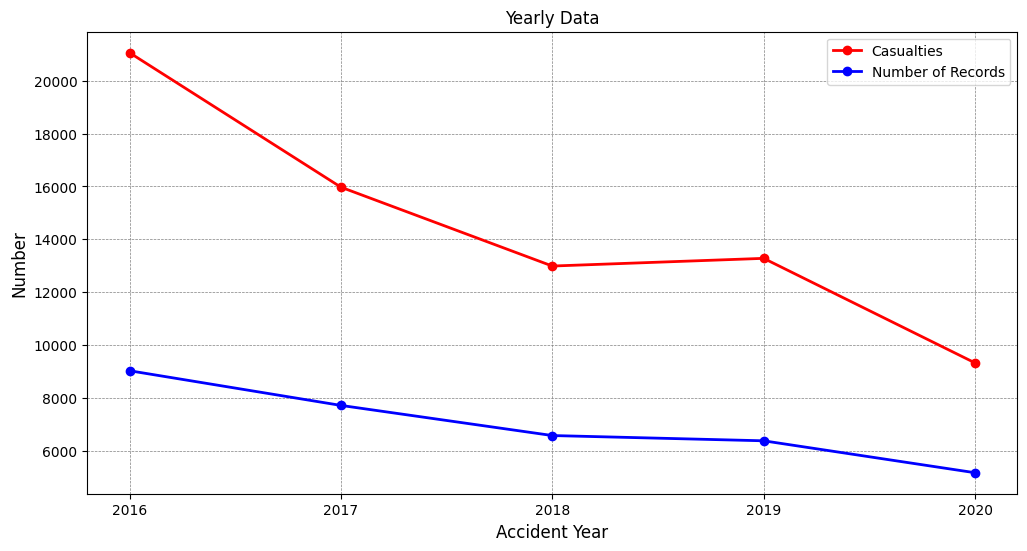

In [ ]:
# First, group by year and calculate the sum of the casualties for each year
yearly_casualties = new_sheet.groupby('accident_year')['number_of_casualties'].sum()
yearly_counts = new_sheet['accident_year'].value_counts().sort_index()

# Setting the drawing size
plt.figure(figsize=(12,6))

# Draw a line for the number of casualties
plt.plot(yearly_casualties.index, yearly_casualties.values, marker='o', linestyle='-', linewidth=2, color='red', label='Casualties')

# Draw a line for the number of accidents
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', linewidth=2, color='blue', label='Number of Records')

# x,y axis and chart titles
plt.xlabel('Accident Year', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Yearly Data', fontsize=12)

plt.legend()

# Remove the decimals automatically added by matplotlib in the X-axis
plt.xticks(ticks=np.arange(min(yearly_counts.index), max(yearly_counts.index)+1, 1))

# Style definitions
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

The trend in traffic accidents can be observed by plotting line graphs of the data on the number of casualties and the number of accidents respectively.

The number of accidents and the number of casualties show a high degree of consistency, both decreasing year by year.

Several possible explanations for this observation are:
1. as technology has developed, vehicle safety has improved and people have become more aware of traffic safety.
2. stricter safety regulations and increased penalties imposed by the government.
3. more effective and immediate emergency response.
4. changes in the way accident data is reported.

The data in this dataset does not cover enough aspects to explore this phenomenon any further.

However, it is also important to note that the data for 2019 to 2020 may be affected by COVID-19. Because of home isolation, this period may have shown a lower number of accidents than the normal period.

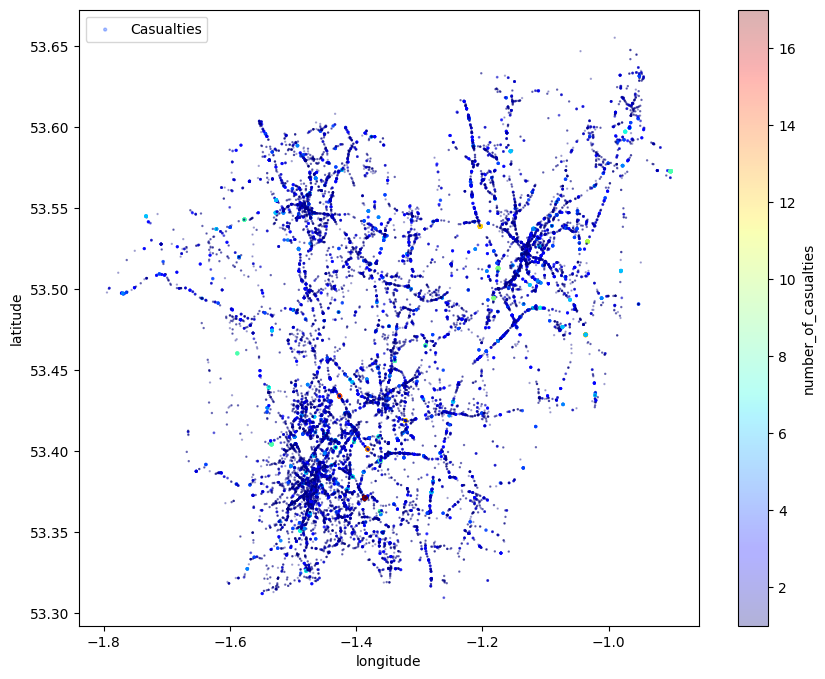

In [ ]:
#Make a distribution with geographic location
new_sheet.plot(kind="scatter", x="longitude", y="latitude",
    s=new_sheet['number_of_casualties']/2, label="Casualties",
    c="number_of_casualties", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.3, figsize=(10,8),
)

plt.legend()
plt.show()

Use the latitude and longitude information in the sheet to create a scatter plot for each accident. Use different colours to mark the number of casualties in each accident.

This gives us an idea of where traffic accidents are frequent and where serious accidents have occurred.

It is difficult to distinguish the geographical location of the accident from the map above, only the general shape of the road network can be seen through the scatter of accidents.

Next, the latitude, longitude and number of casualties are extracted from the original dataframe as a list, so that they correspond to the real locations on the map, and the number of casualties is marked with shades of colour and circle sizes.

In [ ]:
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (
  GeoJSONDataSource, GMapOptions, GMapPlot, ColumnDataSource, Circle,CircleX,Hex, Square, Patches, LabelSet, HoverTool,Legend, LegendItem, Plot, LinearAxis, Grid, LogColorMapper, LinearColorMapper, ColorBar, BasicTicker,
  TapTool,Range1d, PanTool, WheelZoomTool, BoxSelectTool,OpenURL, ZoomInTool, ZoomOutTool, Arrow, OpenHead, NormalHead, VeeHead, LabelSet, Label
)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5

# Designated as the approximate centre of Yorkshire
# 53.44034241333269, -1.378660489749331（From Google Map）
# Bokeh User Guide https://docs.bokeh.org/en/3.0.3/docs/reference/models/map_plots.html
# Map Type Help Document https://developers.google.com/maps/documentation/javascript/reference?hl=zh-cn#MapTypeId
map_options = GMapOptions(lat = 53.44, lng = -1.3786, map_type = "roadmap", zoom=10)
plot = GMapPlot(x_range=Range1d(), y_range=Range1d(), map_options=map_options)

# API created from my Google Maps developer platform
#To prevent misuse, the API key here has been modified to an invalid API key. If you need to use it, please replace it with your own Google Maps API key.
plot.api_key = "BIzbXjBb_RscsILBiZCDYtKUyMY2hKLdql3nW56" 

# Matching the position in the table to the display position
source = ColumnDataSource(
    data=dict(
        lat = new_sheet.latitude.tolist(),
        lon = new_sheet.longitude.tolist(),
        size = (new_sheet['number_of_casualties']).tolist(),
        color = new_sheet.number_of_casualties.tolist()
    ))

# Stylised definition of the map
color_mapper = LinearColorMapper(palette=Viridis5)

circle = Circle(x="lon", y="lat", size="size", fill_color={'field': 'color', 'transform': color_mapper}, fill_alpha=0.5, line_color=None)
plot.add_glyph(source, circle)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
plot.add_layout(color_bar, 'right')

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
#output_file("gmap_plot.html")
output_notebook()

show(plot)

From the heat map above, we can see that accidents occur in large numbers throughout Yorkshire. This is especially the case on main roads.

In addition, urban and rural areas show a different distribution. Moreover, more significant traffic accidents often occur at motorway-level crossings on the city's outskirts.

In order to learn from the lessons of the past and to minimise and reduce traffic accidents in the future. This time we focus more on the characteristics of the causes of accidents and the precise prevention of traffic accidents.

In [ ]:
#Delete rows containing NaN from the region column
new_sheet_1 = new_sheet.dropna(axis=0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


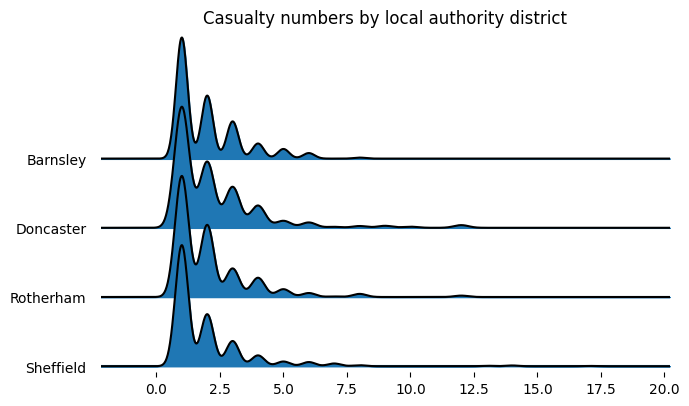

In [ ]:
!pip install joypy
import joypy
# Draw Plot
fig, axes = joypy.joyplot(new_sheet_1, column=['number_of_casualties'], by="local_authority_district", ylim='own', figsize=(7,4))

# Decoration
plt.title('Casualty numbers by local authority district')
plt.show()

The data for the whole of Yorkshire is broken down to look at each local area.

It can be found that the number of casualties is highest at two people and below.

Each area obeys a similar distribution.

So what caused such an accident?

## 5.2 What are the characteristics of the drivers and the vehicle used by them?

Let us start by identifying each age group's characteristics in causing car accidents.

By counting the number of records in each category in the column for the different age groups, we can know the cumulative number of accidents caused by each age group from 2016 to 2020.

This is presented as a bar chart. This helps us visually determine the number of accidents caused by drivers in each age group and make a cross-sectional comparison between the different age groups to identify the ones with the highest numbers.

In [ ]:
#Solutions for interactive charts
!pip install plotly
import plotly.graph_objs as go
import plotly.express as px

# Creating bar chart
fig = px.histogram(
    new_sheet,
    x='age_band_of_driver',
    title='The number of accidents committed by drivers in different age groups',  # Add custom title
    color_discrete_sequence=['#1F77B4'],  # Add custom colours
    nbins=10,  # Set histogram width
)

# Update the axis title
fig.update_xaxes(title_text='Age band of drivers')
fig.update_yaxes(title_text='Total number of accidents (cases)')
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(Data missing or out of range is not accounted for in this analysis)

The graph above illustrates that many accidents occur within the 26-55 age groups, suggesting that drivers within these age brackets are more susceptible to causing accidents.
So, which type of vehicle is most frequently involved in these accidents?
To delve into this issue, three different variables are implicated:

1. Types of vehicles
2. The number of accidents attributed to each vehicle type
3. The corresponding age groups involved

Two of these variables are categorical, with only one being numerical. We can effectively portray this data by representing the two categorical variables on the X and Y axes and using gradient color intensity to reflect the number of accidents. Consequently, generating a heatmap would be an appropriate method for visualization.

In [ ]:
# The data were first grouped and the number of each age range and type of transport was calculated
grouped_data = new_sheet.groupby(['age_band_of_driver', 'vehicle_type']).size().reset_index(name='count')

fig = px.density_heatmap(
    grouped_data,
    x='age_band_of_driver',
    y='vehicle_type',
    z='count',
    title='Type and number of means of transport used by drivers of different age groups',
    color_continuous_scale='Viridis',
)

fig.update_xaxes(title_text='Driver age range')
fig.update_yaxes(title_text='Vehicle type')

fig.show()

At first sight, the heatmap may seem strange, but there is a reason behind this.

The chart shows that individuals aged 26-35, 36-45, and 46-55 driving small cars account for a significantly higher number of traffic accidents than other groups. This results in the number of accidents involving other types of vehicles appearing relatively insignificant. However, the number of accidents caused by other vehicle types should not be dismissed.

However, it is undeniable that these three age groups are the primary contributors to most car accidents.

So, beyond human factors, what external elements also significantly influence the incidence of accidents? The following brief analysis will consider the impact of weather conditions as an example.

## 5.3 What are the characteristics of the weather in the area?

### 5.3.1 Weather conditions at the time of the accident as expressed in all available data

Firstly, from a macroscopic perspective, as per available records, the primary weather conditions at the time of the accidents are as follows. Concurrently, it also reflects the predominant weather types in York County.

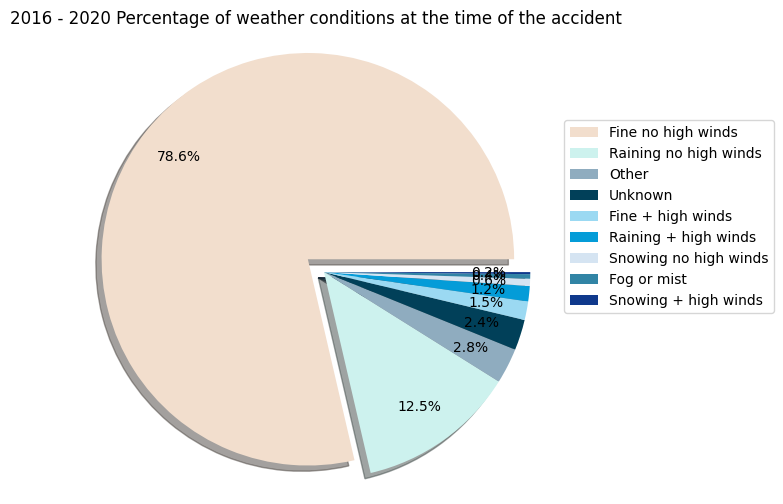

In [ ]:
#specify 'inline' mode
#%matplotlib inline

#Classify the weather and calculate the percentage of weather
weather_types = new_sheet.groupby('weather_conditions')
weather_counts = new_sheet['weather_conditions'].value_counts(normalize=True) * 100

#plt.pie(weather_counts, labels = weather_types)
fig = plt.figure(figsize=(6, 6))
labels=weather_counts.index.tolist()
explode = (0.1,0,0,0,0,0,0,0,0)
colors = ['#f2decd','#cdf2ee','#8facbf','#014059','#9bd9f2','#049cd8','#d5e4f2','#3184a5','#0f398c']
chart = plt.pie(weather_counts,autopct = '%1.1f%%',colors = colors, pctdistance = .8, shadow = True, explode = explode)
plt.legend(chart[0], labels, loc = 'right', bbox_to_anchor=(1.5, 0.6))
plt.axis('equal')
plt.title('2016 - 2020 Percentage of weather conditions at the time of the accident')
plt.show()

The chart shows that accidents occurring in fair weather and rainy conditions account for over 80% of all historical accidents. In contrast, the likelihood of accidents under other adverse weather conditions is smaller.

Speculations on the reasons behind this phenomenon include:
1. Fine weather and relatively less severe weather conditions make up a significant proportion of this region's climate, while other extreme weather conditions are rarer.

    This situation leads to a higher frequency of fair and not-so-poor weather conditions (such as rainy days) and a lower frequency of severe weather conditions. Therefore, in terms of count, the number of accidents in fair weather significantly outnumbers those in adverse weather conditions.

2. Better visibility and road conditions are typically observed during fair and less severe weather conditions, encouraging more people to venture out.
    As the volume of traffic increases, the probability of accidents also rises, leading to an increase in the count of accidents.
    On the other hand, the situation is reversed in adverse weather conditions. Therefore, the accident count in adverse weather conditions is lower in comparison.

However, due to the lack of data on traffic volume under different weather conditions in this dataset, this hypothesis cannot be validated.

### 5.3.2 Relationship between different weather and accident severity

For correlation analysis of type data, non-parametric statistical methods such as the Chi-squared test or Cramér's V can be used to check the association between two categorical variables.

However, this brief analysis report does not include such content, and we will assume a positive correlation between the severity of weather and the severity of accidents.

Next, by iterating through each type of weather and outputting the proportion of severe accidents from high to low, we can observe under which weather conditions serious accidents occur more frequently.

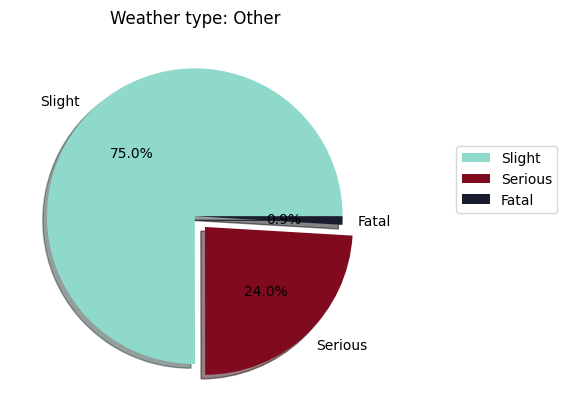

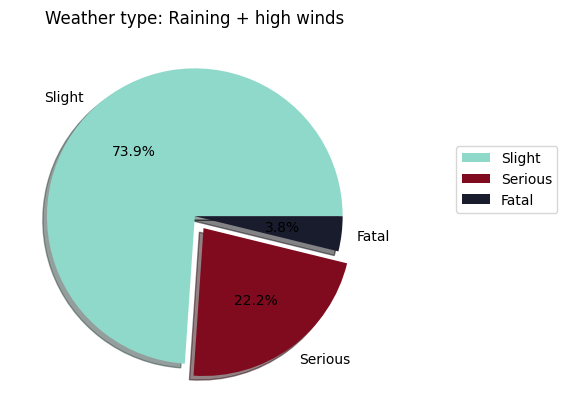

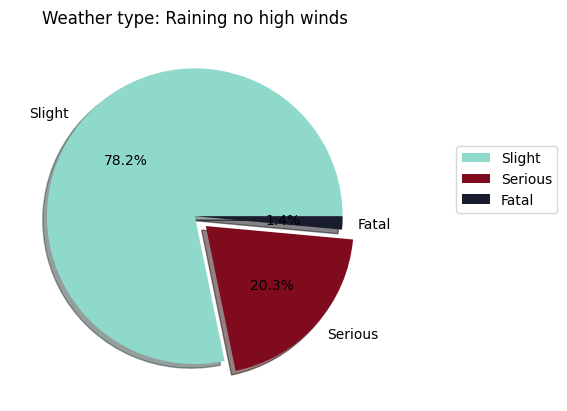

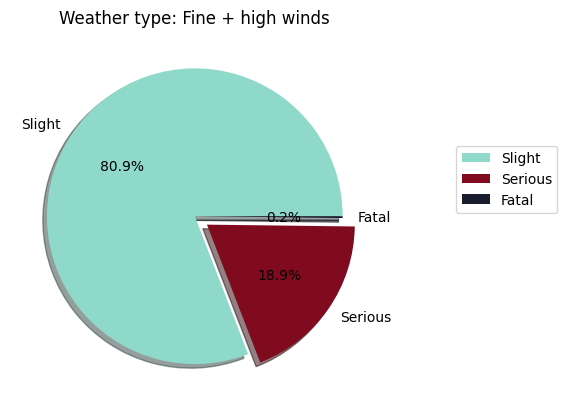

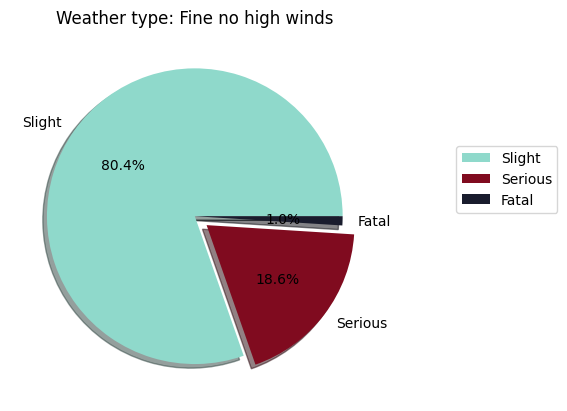

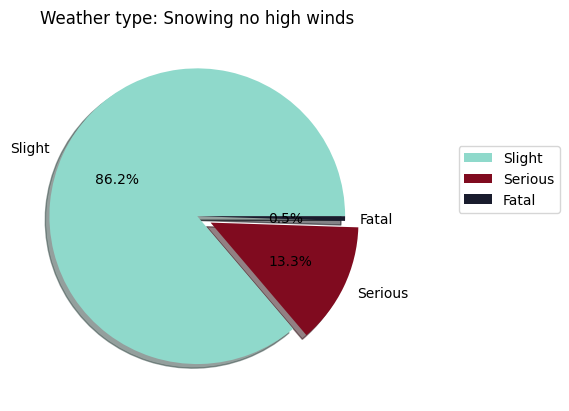

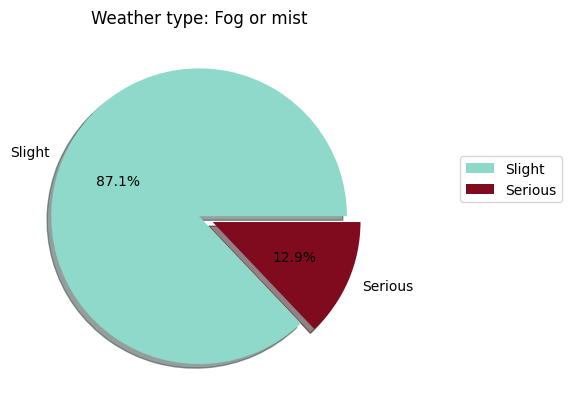

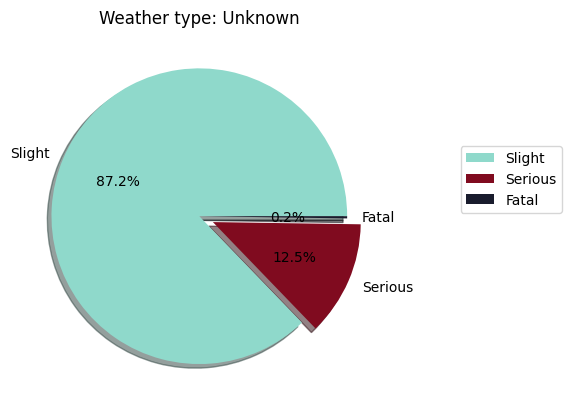

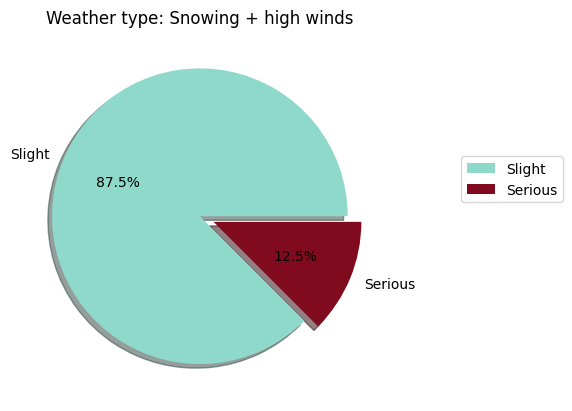

In [ ]:
weathers = new_sheet['weather_conditions'].unique()

# Because multiple incident types correspond to one weather type, like a key-value pair, they can be sorted by writing them to a list
# Calculate the percentage of accident severity for each weather condition and store it in a list
weather_severity_proportions = []
for i in weathers:
    severity_proportions = new_sheet[new_sheet['weather_conditions'] == i]['casualty_severity'].value_counts(normalize=True)
    weather_severity_proportions.append((i, severity_proportions))

# Sorting the list according to the percentage of Serious type incidents
sorted_weather_severity = sorted(
    weather_severity_proportions,
    key=lambda x: x[1].get('Serious', 0),
    reverse=True
)

# Specify colour
colors = ['#8fd9cb', '#800b1f', '#191c2d']

# Iterate through the sorted results and generate the corresponding pie chart
for i, severity_proportions in sorted_weather_severity:
    sorted_severity_proportions = severity_proportions.sort_values(ascending=False)
    explode = [0.1 if index == 'Serious' else 0 for index in sorted_severity_proportions.index]

    plt.figure()
    plt.pie(sorted_severity_proportions, autopct='%1.1f%%', colors = colors, shadow = True, explode = explode, labels=sorted_severity_proportions.index)
    plt.legend(loc='right', bbox_to_anchor=(1.5, 0.6))
    plt.title(f'Weather type: {i}')
    plt.show()

This time, an in-depth analysis of severe weather and accidents occurring in smaller sample sizes is not done.

As we can see from the graph above, more serious accidents are more likely to occur during the rainy months.

However, the weather is not evenly distributed throughout the year, so we first need to explore its seasonal characteristics and filter out the months with the highest incidence of accidents.

### 5.3.3 Seasonal patterns of weather

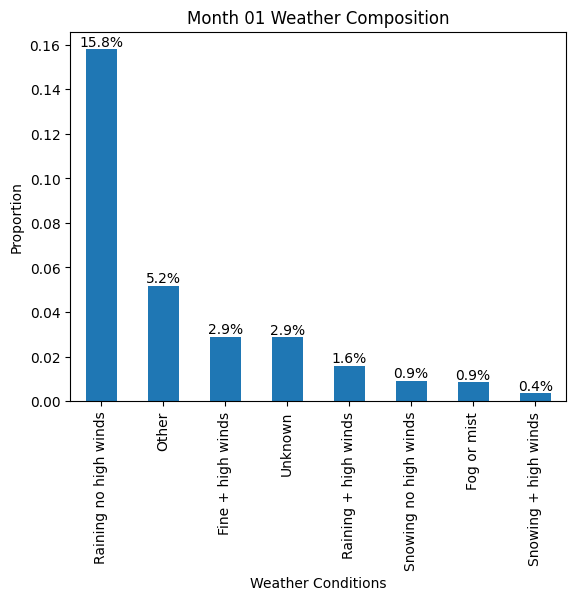

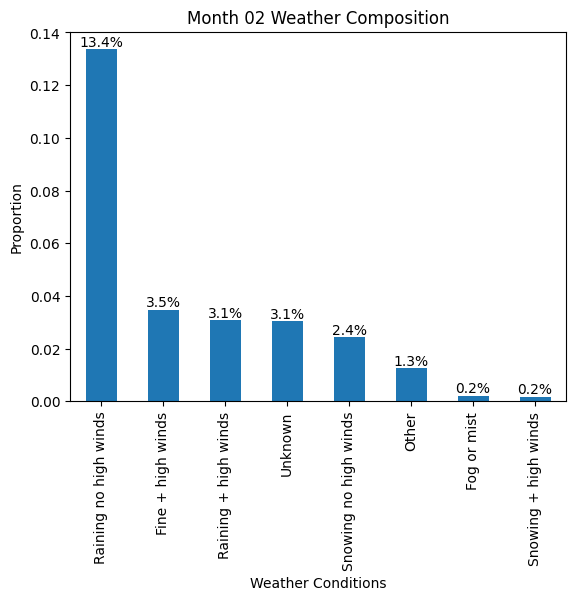

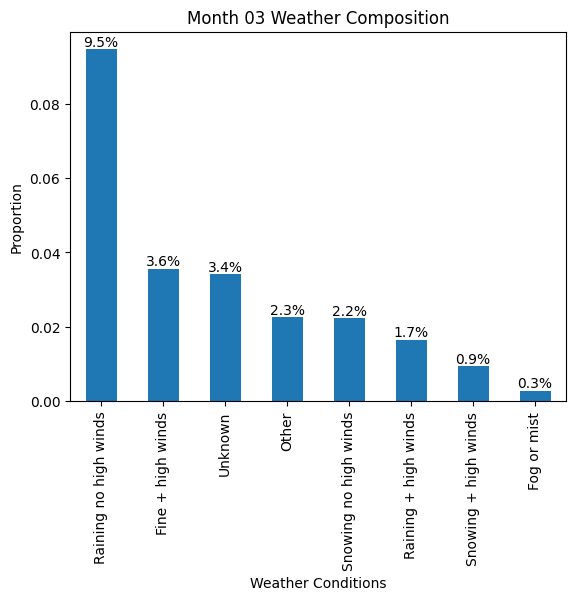

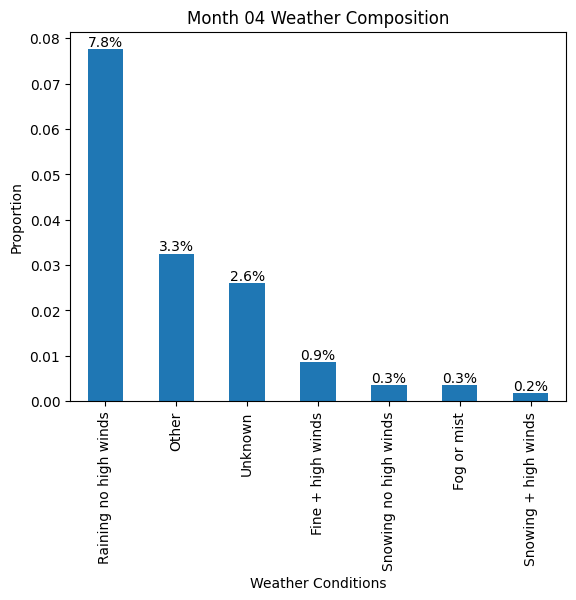

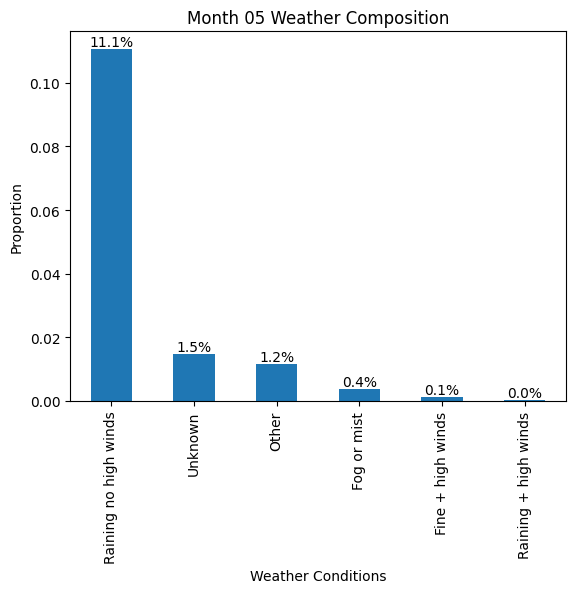

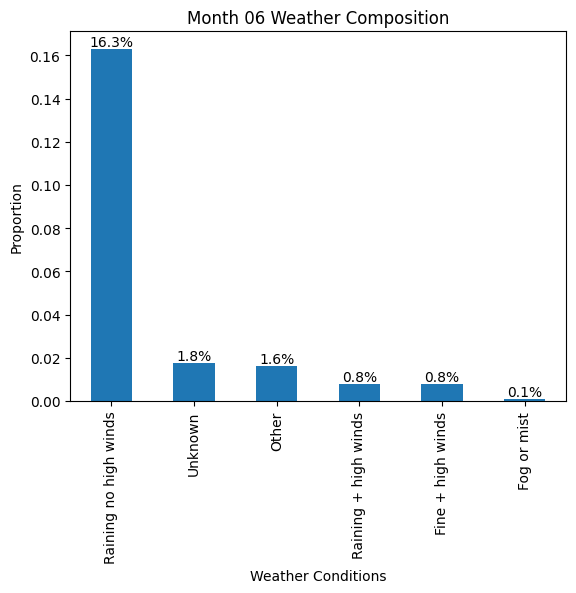

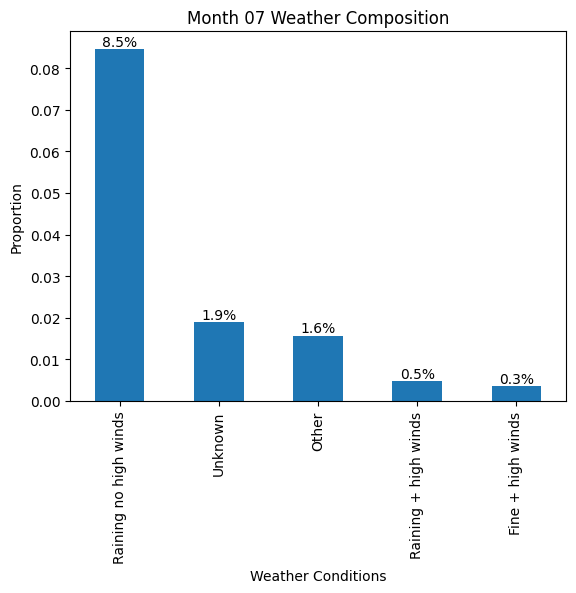

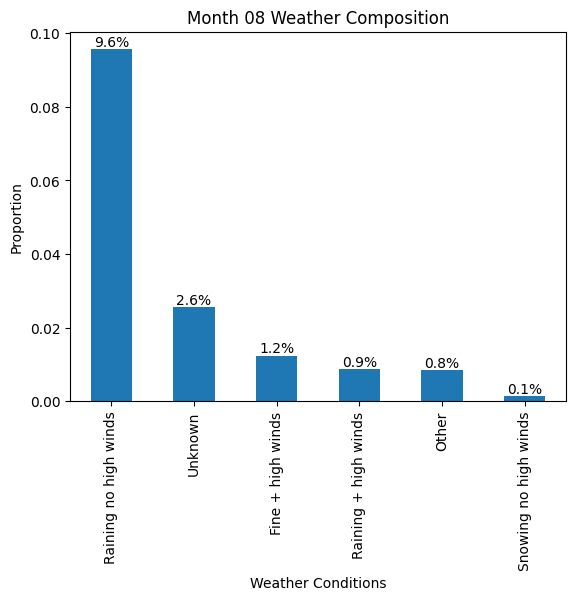

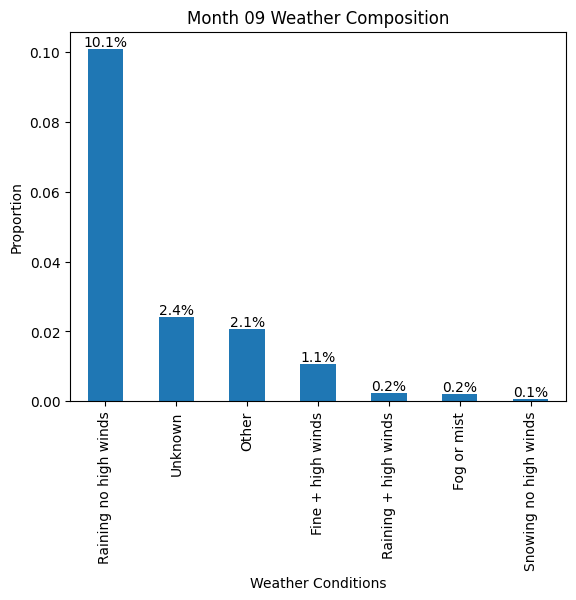

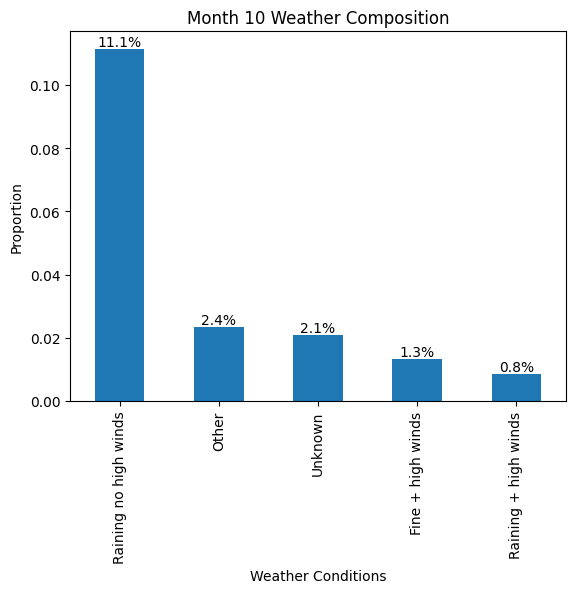

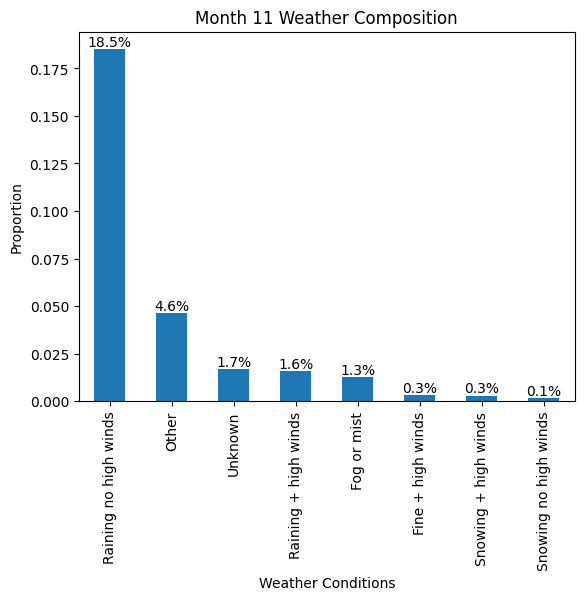

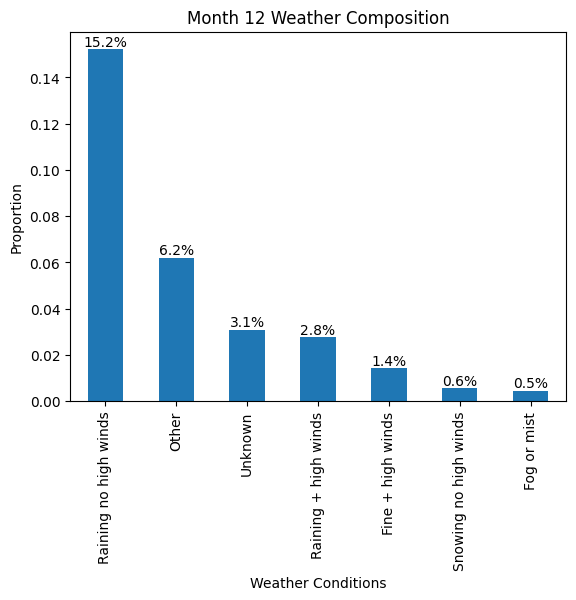

In [ ]:
#Weather distribution by month
# Get all months
months = new_sheet['Month'].unique()

# Generating pie charts month by month
for month in months:
    # Filter out the data for the current month
    month_data = new_sheet[new_sheet['Month'] == month]

    # use value_counts(normalize=True) Calculate the percentage of different weather
    weather_proportions = month_data['weather_conditions'].value_counts(normalize=True)
    #Other，Deleted as not in the discussion so that we can focus more on the rainy days
    clean_weather_proportions = weather_proportions.drop(labels=['Fine no high winds'])

    # Generate bar chart
    plt.figure()
    clean_weather_proportions.plot(kind='bar')
    plt.xlabel('Weather Conditions')
    plt.ylabel('Proportion')
    plt.title(f'Month {month} Weather Composition')
    plt.xticks(rotation = 90)

    for i, v in enumerate(clean_weather_proportions):
        plt.text(i, v, "{:.1%}".format(v), ha='center', va='bottom')

    plt.show()

Serious traffic accidents are more likely to occur in rainy weather.

The months of January, June, November and December have a higher percentage of rainy weather than 15%, making these months the most frequent months for serious traffic accidents.

# 6. Conclusions and recommandations

## 6.1 Conclusions
The above information shows that people in the age groups of 26-35, 36-45 and 46-55 are more likely to be involved in a serious accident in a small car in the rain.

Drivers aged 26-35 were more likely to be involved in serious accidents than those aged 36-45 and 46-55.

These serious accidents are likely to occur at motorway level crossings on the outskirts of cities.

## 6.2 Recommandations
The transport department can use census data to learn about people in the region who fall within the three age brackets mentioned above and, with the assistance of communications companies, send alert messages to people in these groups on dates when heavy rain is forecast.

When there is heavy rain, additional police officers are deployed at level crossings on the outside of the city to prevent accidents and to prepare for the timely rescue of potential accidents.